In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [26]:
gold_data=pd.read_csv('C:\\Users\\Pallavi\\Downloads\\gold.zip')

In [27]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [28]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [29]:
gold_data.shape

(2290, 6)

In [30]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [31]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [32]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [33]:
gold_data["Date"] = pd.to_datetime(gold_data["Date"])
correlation=gold_data.corr()


<Axes: >

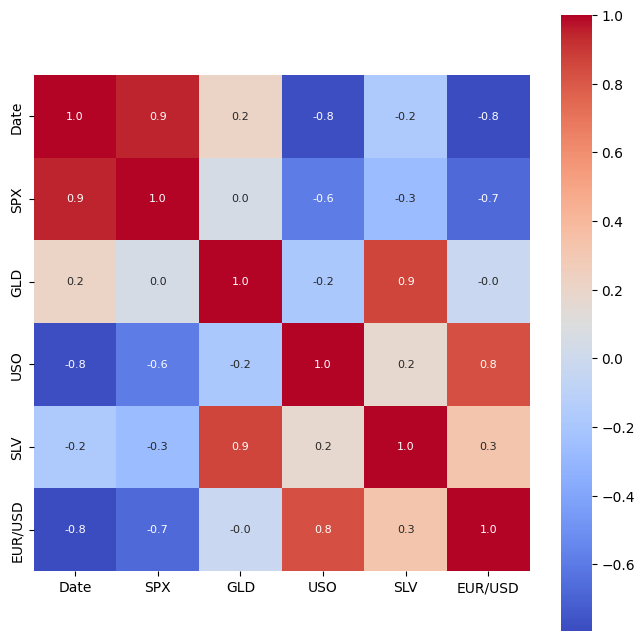

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

In [35]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


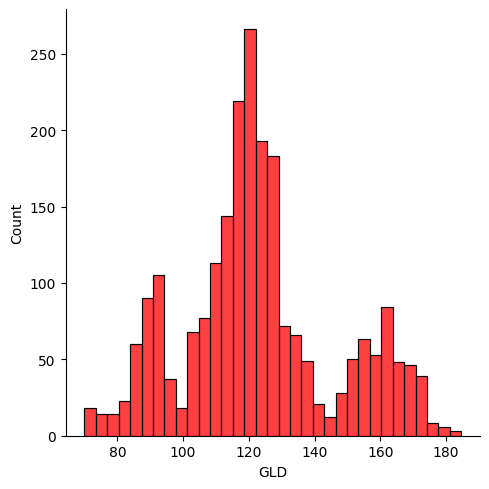

In [36]:
sns.displot(gold_data['GLD'],color='red')

In [37]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [38]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [39]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [41]:
regressor=RandomForestRegressor(n_estimators=200)

In [42]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [43]:
test_data_prediction=regressor.predict(X_test)

In [44]:
print(test_data_prediction)

[168.52875005  82.06554986 115.97510005 127.65405064 120.79140133
 154.70099767 149.9997987  126.25015024 117.60204896 126.19690026
 116.47795126 171.81105119 141.32314832 167.6009982  115.25665034
 117.70740053 138.51655301 169.96235074 159.52445331 158.20560024
 155.08360038 125.36700018 176.41834949 157.14395312 125.21935027
  93.82584979  77.34860005 120.45475005 119.12399952 167.45644989
  88.15565068 125.09530013  91.18270071 117.55680038 121.09214936
 136.07885099 115.58275112 114.78170073 148.30485009 107.08305104
 104.53985249  87.26754791 126.51880034 117.95415015 153.71719873
 119.63610028 108.34429997 108.04899834  93.34205065 127.07714784
  74.6416006  113.59354931 121.44245017 111.37529885 118.75464884
 120.78649946 159.32980049 168.03495072 147.07744688  85.99629883
  94.42530046  86.8480988   90.45615013 118.89605085 126.46290044
 127.70060017 169.30244973 122.3367493  117.30504924  98.4745002
 167.87555133 142.96009877 132.02915243 121.25210229 121.23539946
 119.713700

In [45]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9891889540060408


In [46]:
Y_test=list(Y_test)

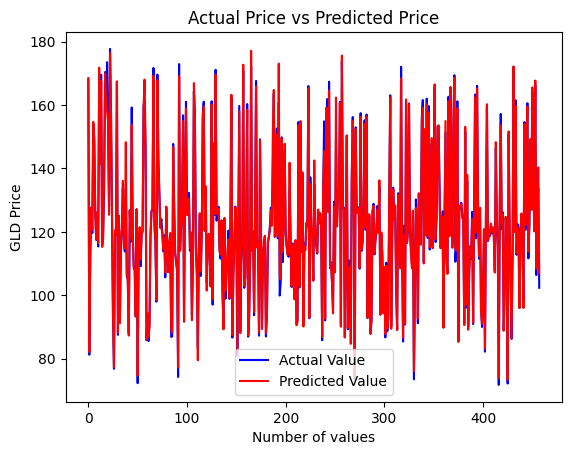

In [47]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='red',label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()



In [48]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(regressor, f)